In [2]:
#libraries

%matplotlib inline
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import unidecode
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
file = pd.read_csv('CameronData.csv', index_col='Index')
file2 = pd.read_csv('CameronData - Updated.csv', index_col='Index')
file.Comments=file.Comments.astype(str)
file.Posting=file.Posting.astype(str)

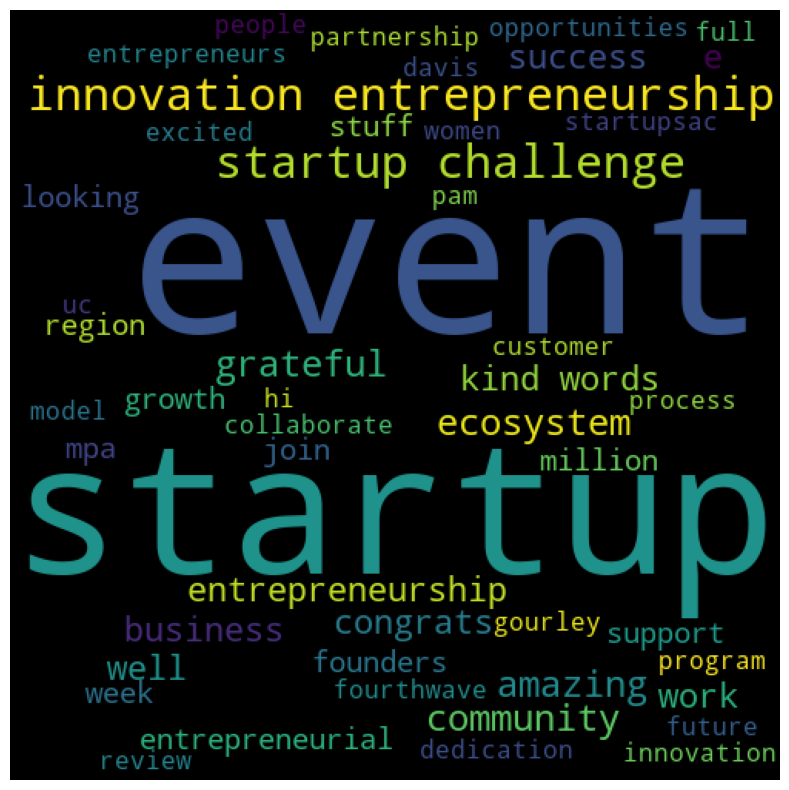

Done, Q5WordCloud.png is ready.


In [3]:
#Comments
#Put the contents of the csv file into the dataframe
df_cameron = file

# I am converting dictionary to a list so I can analyze the data
#yelp_review_list = list(yelp_review_dictionary.lyrics)
list_cameron = df_cameron['Comments'].to_list()

#convert text to lower case
list_cameron_lower = [i.lower() for i in list_cameron]

#remove special characters
list_cameron_lower = [re.sub(r"[^a-zA-Z]", " ", text) for text in list_cameron]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in list_cameron_lower:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())


#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

clean_cameron=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        clean_cameron.append(string)

delinked_cameron=[]
#Remove links
for text in clean_cameron:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        delinked_cameron.append(remove_com)

#Remove special characters
delinked_cameron = [unidecode.unidecode(text) for text in delinked_cameron]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in delinked_cameron]

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

clean_cameron=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        clean_cameron.append(string)

comment_string = ''
for eachletter in  str(cleantext):
    comment_string += eachletter

input = TextBlob(comment_string)

noun_phrases = input.noun_phrases

comment_string = ''
for eachletter in  str(noun_phrases):
    comment_string += eachletter

listofWords = ['\'','thank','cameron','great','carlsen','congragulations','sacramento','laura','sal','dick','jasso','latoya','mariah','franklin','burris','isaac','stephanie',
               'mark','mcgann','david']
for z in listofWords:
    comment_string = comment_string.replace(z,'')

#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='black',
            stopwords=stopwords_list,
            min_font_size = 10,
            max_words=50,
            prefer_horizontal=1.0).generate(comment_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Q5WordCloud.png', bbox_inches='tight', dpi=300)
plt.show()

print("Done, Q5WordCloud.png is ready.")

#### Looking at the word cloud generated here, the most common words are startup and event. Overall the comments seem to reflect individuals who attended the events posted by the Carlsen Center for Innovation & Entrepreneurship parroting the buzzwords from the posts about the events. It appears that amongst industry trends the comments focus heavily on supporting startups in the greater Sacramento Region. Individuals attending these events are either new business owners or investors looking for opportunities. Focusing your advertising language to attract people who do not understand what 'making innovation and entrepreneurship simple, accessible, and pervasive' may create a larger social impact, driving up interest in donors and investors in the entrepreneurs the Carlesn Center looks to help with their programs. It is important to note that a lot of the comments are very positive, which shows your impact on those who attend is getting high marks.

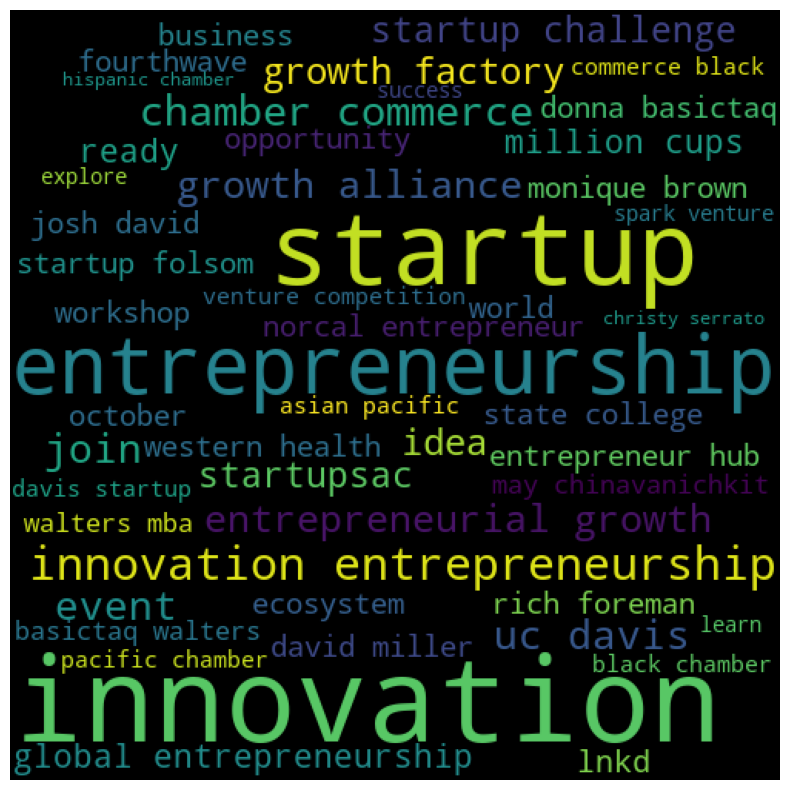

Done, Q6WordCloud.png is ready.


In [4]:
#Comments and Posting
#Put the contents of the csv file into the dataframe
df_cameron = file

# I am converting dictionary to a list so I can analyze the data
#yelp_review_list = list(yelp_review_dictionary.lyrics)
list_cameron = []
list_cameron = df_cameron['Comments'].to_list()
list_cameron_temp = df_cameron['Posting'].to_list()
for x in list_cameron_temp:
    list_cameron.append(x)
    
#convert text to lower case
list_cameron_lower = [i.lower() for i in list_cameron]

#remove special characters
list_cameron_lower = [re.sub(r"[^a-zA-Z]", " ", text) for text in list_cameron]
CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in list_cameron_lower:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())


#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

clean_cameron=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        clean_cameron.append(string)

delinked_cameron=[]
#Remove links
for text in clean_cameron:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        delinked_cameron.append(remove_com)

#Remove special characters
delinked_cameron = [unidecode.unidecode(text) for text in delinked_cameron]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in delinked_cameron]

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

clean_cameron=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        clean_cameron.append(string)

comment_string = ''
for eachletter in  str(cleantext):
    comment_string += eachletter

input = TextBlob(comment_string)

noun_phrases = input.noun_phrases

comment_string = ''
for eachletter in  str(noun_phrases):
    comment_string += eachletter

listofWords = ['\'','thank','cameron','great','carlsen','congragulations','sacramento','laura','sal','dick','jasso','latoya','mariah','franklin','burris','isaac','arlene j']
for z in listofWords:
    comment_string = comment_string.replace(z,'')

#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='black',
            stopwords=stopwords_list,
            min_font_size = 10,
            max_words=50,
            prefer_horizontal=1.0).generate(comment_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Q6WordCloud.png', bbox_inches='tight', dpi=300)
plt.show()

print("Done, Q6WordCloud.png is ready.")

#### Looking at Posting and Comments combined we see mention of many different regional groups. These are all elements of local industry sectors. The primary recommended focus would be to go to the Sacramento or Davis City Council or Chamber of Commerce to see what the Carlsen Center can guide its entrepreneur's to in regards to assisting the Hispanic or Asian Pacific communities, as well it may be a good idea for Carlsen to reach out to FourthWave, a self proclaimed accelerator for women-led technology businesses. 

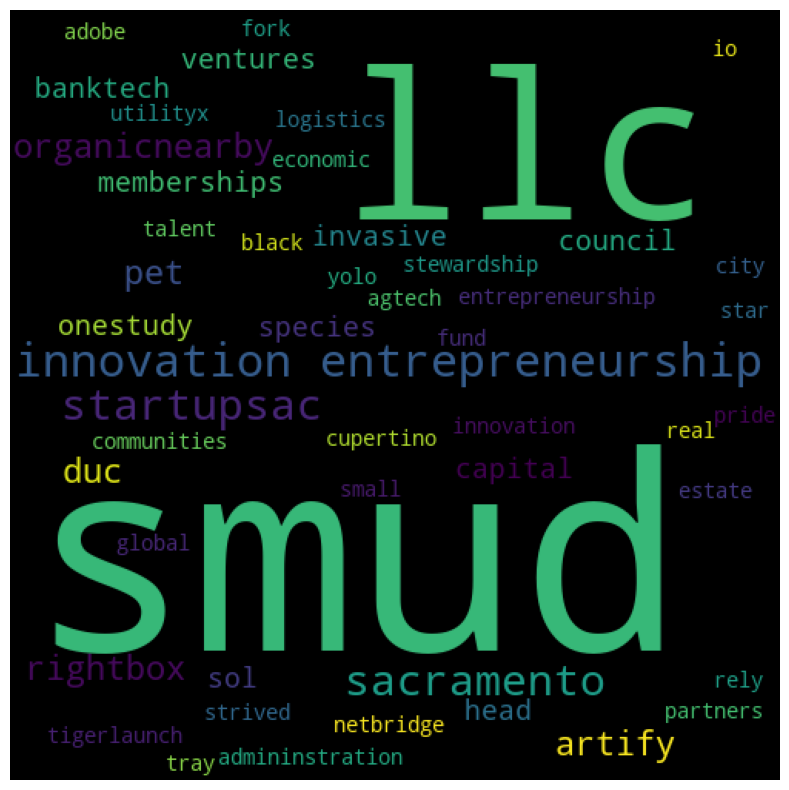

Done, ExtraWordCloud1.png is ready.


In [5]:
#Commenter Organization Name
#Put the contents of the csv file into the dataframe
df_cameron = file2

# I am converting dictionary to a list so I can analyze the data
#yelp_review_list = list(yelp_review_dictionary.lyrics)
list_cameron = []
list_cameron = df_cameron['Commenter Organization Name'].dropna().to_list()

#convert text to lower case
#list_cameron_lower = [i.lower() for i in list_cameron]

#remove special characters
list_cameron_lower = [re.sub(r"[^a-zA-Z]", " ", text) for text in list_cameron]
CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in list_cameron_lower:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())


#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

clean_cameron=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        clean_cameron.append(string)

delinked_cameron=[]
#Remove links
for text in clean_cameron:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        delinked_cameron.append(remove_com)

#Remove special characters
delinked_cameron = [unidecode.unidecode(text) for text in delinked_cameron]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in delinked_cameron]

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

clean_cameron=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        clean_cameron.append(string)

comment_string = ''
for eachletter in  str(cleantext):
    comment_string += eachletter

input = TextBlob(comment_string)

noun_phrases = input.noun_phrases

comment_string = ''
for eachletter in  str(noun_phrases):
    comment_string += eachletter

listofWords = ['\'','carlsen']
for z in listofWords:
    comment_string = comment_string.replace(z,'')

#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='black',
            stopwords=stopwords_list,
            min_font_size = 10,
            max_words=50,
            prefer_horizontal=1.0).generate(comment_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('ExtraWordCloud1.png', bbox_inches='tight', dpi=300)
plt.show()

print("Done, ExtraWordCloud1.png is ready.")

#### Looking at the Commenter Organization Name points us to a few specific Industries to focus on. Smud, Sol, a number of Internet of Things companies. It may be advised to focus on the startup tech businesses, as they would have a solid overlap with lots of these groups.

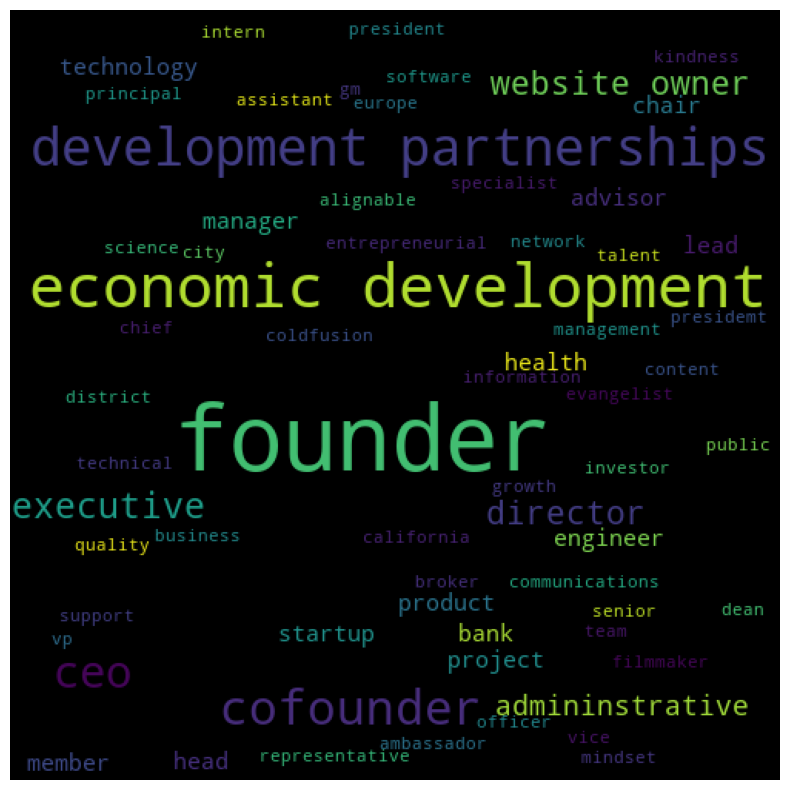

Done, ExtraWordCloud2.png is ready.


In [6]:
#Commenter Job Title
#Put the contents of the csv file into the dataframe
df_cameron = file2

# I am converting dictionary to a list so I can analyze the data
#yelp_review_list = list(yelp_review_dictionary.lyrics)
list_cameron = []
list_cameron = df_cameron['Commenter Job Title'].dropna().to_list()

#convert text to lower case
#list_cameron_lower = [i.lower() for i in list_cameron]

#remove special characters
list_cameron_lower = [re.sub(r"[^a-zA-Z]", " ", text) for text in list_cameron]
CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in list_cameron_lower:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())


#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

clean_cameron=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        clean_cameron.append(string)

delinked_cameron=[]
#Remove links
for text in clean_cameron:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        delinked_cameron.append(remove_com)

#Remove special characters
delinked_cameron = [unidecode.unidecode(text) for text in delinked_cameron]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in delinked_cameron]

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

clean_cameron=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        clean_cameron.append(string)

comment_string = ''
for eachletter in  str(cleantext):
    comment_string += eachletter

input = TextBlob(comment_string)

noun_phrases = input.noun_phrases

comment_string = ''
for eachletter in  str(noun_phrases):
    comment_string += eachletter

listofWords = ['\'','carlsen']
for z in listofWords:
    comment_string = comment_string.replace(z,'')

#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='black',
            stopwords=stopwords_list,
            min_font_size = 10,
            prefer_horizontal=1.0).generate(comment_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('ExtraWordCloud2.png', bbox_inches='tight', dpi=300)
plt.show()

print("Done, ExtraWordCloud2.png is ready.")

#### If we focus on the Job Titles from the commenter's, we see a definitive lean towards founders, developers, partnerships, owners. This makes sense as it is the target group of the Carlsen Center. It may be a good idea to reach out to alternative school locations beyond CSU, as there are a number of business colleges nearby. UC Davis, one of the names that you can see pop up throughout the word clouds generated, might be a good partner for an event or two. They have a Sacramento based working professional program. Cross college cooperation could drum up lots of outreach for the Carlsen Center.